In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
#results = pd.read_csv('./../../../data_source/results/baseline_nofilter_sffs_40vals_10reps_dfs.csv', index_col=0)
results = pd.read_csv('./../../../data_source/results/with_pet_outliers_univariate_sffs_nofilter_dfs.csv', index_col=0)
results.head()

,exp_id,experiment_id,test_score,train_score,test_score_variance,train_score_variance,feature_votes,exp_duration
0,684,StudentTTestSelection_DTreeEstimator,0.629304,0.657456,0.022481,0.000472,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,0 days 00:10:12.873585000
1,559,StudentTTestSelection_DTreeEstimator,0.528846,0.590600,0.010256,0.000747,[10 10 10 10 10 10 10 7 8 10 7 9 8 3 3 ...,0 days 00:09:16.610746000
2,629,StudentTTestSelection_DTreeEstimator,0.512637,0.651458,0.006317,0.000645,[9 5 5 8 7 4 8 7 6 5 4 8 7 7 6 6 3 6 4 4 7 4 4...,0 days 00:11:01.242483000
3,192,StudentTTestSelection_DTreeEstimator,0.562912,0.696808,0.012518,0.000340,[ 6 8 6 4 5 8 7 6 7 6 5 5 8 7 7 ...,0 days 00:10:16.402706000
4,835,StudentTTestSelection_DTreeEstimator,0.594963,0.662974,0.018951,0.000213,[10 10 10 10 9 10 10 10 10 10 10 9 10 10 10 ...,0 days 00:11:40.178124000


In [12]:
results.shape

(320, 8)

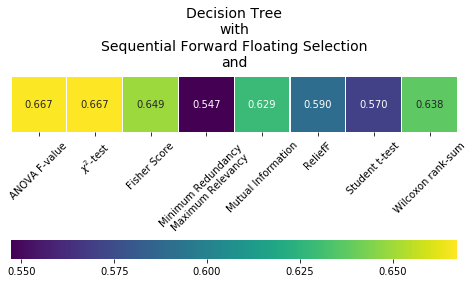

In [13]:
model_grps = results.groupby('experiment_id')
_avg_scores = model_grps['test_score'].mean()
_rows, _cols = zip(*list(map(lambda label: label.split('_'), _avg_scores.index)))
rows, cols = np.unique(_rows), np.unique(_cols)
avg_scores = model_grps['test_score'].mean().values.reshape(np.size(cols), np.size(rows))
std_scores = model_grps['test_score'].std().values.reshape(np.size(cols), np.size(rows))

model_name = 'Decision Tree\nwith\nSequential Forward Floating Selection\nand'
selector_names = [
    'ANOVA F-value', r'$\chi^2$-test', 'Fisher Score',
    'Minimum Redundancy \nMaximum Relevancy', 
    'Mutual Information', 'ReliefF', 
    'Student t-test',
    'Wilcoxon rank-sum'
]
fig, (axis, cbar_axis) = plt.subplots(
    nrows=2, 
    gridspec_kw={'height_ratios': (1.5, 0.05), 'hspace': -0.5}, 
    figsize=(8, 8)
)
fig.subplots_adjust(wspace=0.0001)
sns.heatmap(
    avg_scores,
    #xticklabels=selector_names,  
    yticklabels='',
    vmin=np.nanmin(avg_scores) - 1e-4, 
    vmax=np.nanmax(avg_scores) + 1e-4,
    cmap=plt.cm.viridis, 
    robust=True,
    annot=True, 
    fmt='.3f', 
    square=1, 
    linewidth=.2, 
    ax=axis,
    cbar=True,
    cbar_ax=cbar_axis,
    cbar_kws={'shrink': 0.2, 'orientation': 'horizontal'},  
    
)
axis.set_xticklabels(selector_names, ha='center')
# Position the text.
axis.text(
    0.5, 1.7, 
    model_name, 
    transform=axis.transAxes, 
    fontsize=14,    
    va='center',
    ha='center'
)
axis.tick_params(rotation=45)
plt.savefig(
    #'./../../../figures/univariate_sffs_nofilter_dfs.png',
    './../../../figures/univariate_200vals_40reps_sffs_nofilter_dfs.png',
    bbox_inches='tight',
    transparent=True,
    dpi=600, 
)

In [14]:
std_scores

array([[0.02156846, 0.02672442, 0.03302588, 0.02925383, 0.03707134,
        0.0432411 , 0.04369135, 0.03924521]])

In [ ]:
# TODO:
# * Create a graph with the number of features selected at univariate level and SFFS level in each outer CV loop.